In [1]:
#Classification - Logistic Regression
#Titanic data from kaggle.com  - https://www.kaggle.com/c/titanic/data

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [151]:
#Import train and test data

In [152]:
train = pd.read_csv('titanic_train.csv')

In [153]:
test = pd.read_csv('titanic_test.csv')

In [154]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [156]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


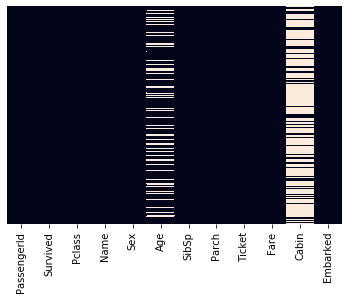

In [157]:
#Find missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [158]:
#Heatmap of booleans, Highlights where missing data in Age and Cabin info

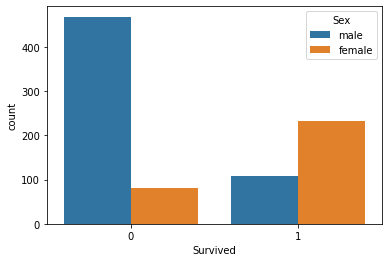

In [159]:
sns.countplot(x='Survived', hue= 'Sex', data = train)

In [160]:
#Fewer survivors than deaths. Mostly male deaths

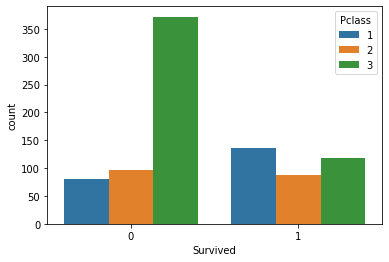

In [161]:
sns.countplot(x='Survived', hue= 'Pclass', data = train)

In [162]:
#Most deaths are in 3rd class

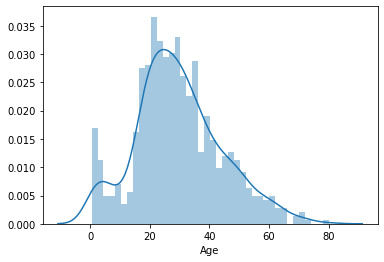

In [163]:
#Getting an idea of age distribution:
sns.distplot(train['Age'].dropna(), bins = 40)

In [164]:
#Quite a few young passengers, average age between 20 and 30

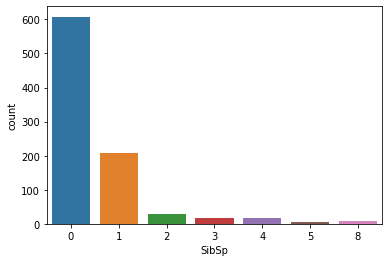

In [165]:
sns.countplot(x='SibSp', data = train)

In [166]:
#SibSp is the number of people with siblings and/or spouses on board
#Most people were travelling solo. Those with 1 i likely a spouse

In [167]:
#Looking at fare distrobution
train['Fare'].iplot(kind='hist',bins=50)

In [168]:
#Most prices lie under £50

In [169]:
#Now time to clean data after exploratory visualisations.
#We can fill in missing ages. We will do this by inserting mean ages according to passenger class

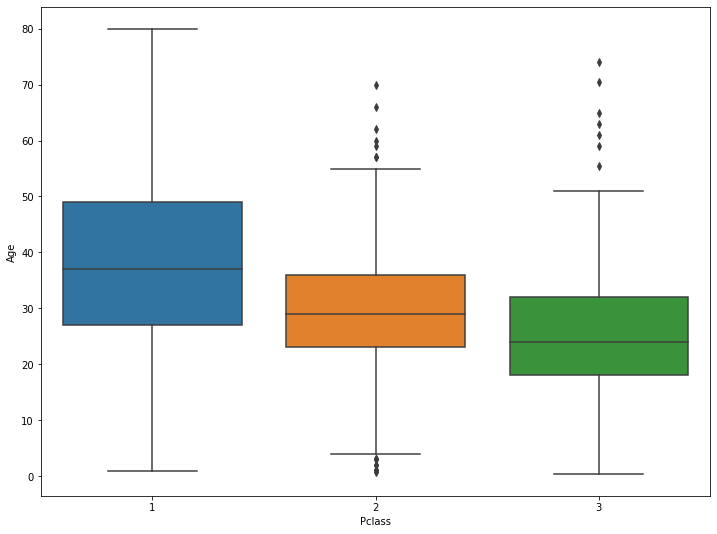

In [170]:
plt.figure(figsize=(12,9))

sns.boxplot(x='Pclass', y = 'Age', data=train)
#This gives the age separation by class. Older people are in higher class

In [171]:
#This info can be imputed according to mean age by class. Defining this function:
#Average age is 37 29 and 24 in classes 1,2 and 3

In [172]:
#Defin function to impute the age according to class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [173]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

In [174]:
#DOING SAME FOR TEST
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis=1)

In [175]:
#Now to relook at heatmap after imputed age

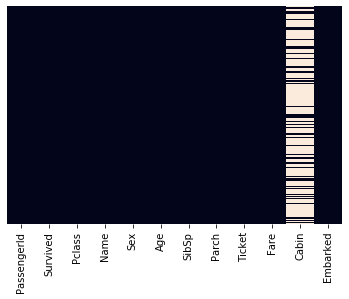

In [176]:
#Find missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

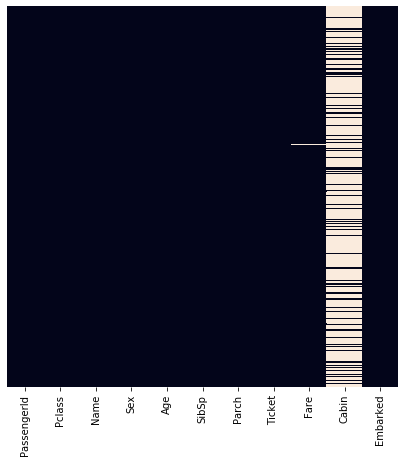

In [177]:
plt.figure(figsize=(7,7))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)
#THERE IS A NaN in FARE DATA!

In [178]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [179]:
#All null ages replaced by average accoridng to age

In [180]:
#Cabin info is too diffuse, so we will omit it

In [181]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [182]:
train.drop('Cabin', axis =1, inplace=True)
test.drop('Cabin', axis =1, inplace=True)

In [183]:
train.head()#Deleted cabin info

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


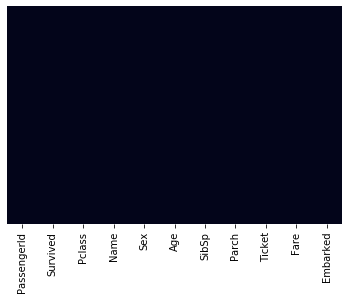

In [184]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)#No more missing values

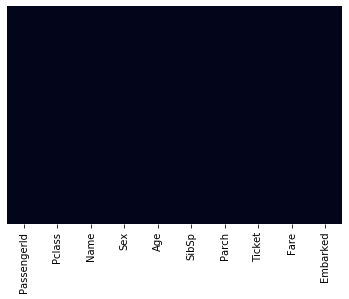

In [185]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)#No more missing values in test

In [186]:
#Now need to convert categorical data into binary value
#Needs to be created into a dummy variable

In [187]:
#Use pd.get_dummies method
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [188]:
#There is one issue - one column becomes a 'perfect predictor' of the other one
#AKA Multico-linearity

In [189]:
#Use pd.get_dummies method
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [190]:
#Now its better
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [191]:
#Do the same for embark column

In [192]:
embark =pd.get_dummies(train['Embarked'],drop_first=True)

In [193]:
# C Column dropped
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [194]:
#Now to concatinate

In [195]:
train = pd.concat([train,sex,embark], axis=1)

In [196]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [197]:
#Notice new columns on RHS
#Some columns can now be deleted

In [198]:
train.drop(columns = ['Name', 'Ticket','Sex','Embarked'], axis = 1, inplace = True)

In [199]:
train.head()
#Looks perfect for ML - only numbers!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [200]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [201]:
#PassengerId is basically the index, so can also be removed
train.drop(columns = ['PassengerId'], axis = 1, inplace = True)

In [202]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [203]:
#Could also do pd.get_dummies on Pclass - it is technical a categorical column. This will be done later

In [204]:
#Doing same for test data:
#Use pd.get_dummies method on sex and embarked
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [205]:
#Concat the test data
test = pd.concat([test,sex,embark], axis = 1)

In [206]:
#Remove useless test columns:
test.drop(columns = ['Name', 'Ticket','Sex','Embarked'], axis = 1, inplace = True)

In [207]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.321770,0.447368,0.392344,35.627188,0.636364,0.110048,0.645933
std,120.810458,0.841838,12.904065,0.896760,0.981429,55.907576,0.481622,0.313324,0.478803
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,25.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,31.500000,1.000000,0.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [208]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [209]:
#What do we want to predict? --> survival i.e. y axis

In [234]:
X_train = X = train.drop(columns = ['Survived'], axis = 1)
y_train = train['Survived']

In [235]:
#X_test = test.drop(columns = ['PassengerId'], axis = 1, inplace = True)

In [236]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [237]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.066409,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.836071,13.244532,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [238]:
#Fill the NaN with mean of fare which is 35.6
X_test = test.fillna(35.6)

In [239]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,2.265550,29.321770,0.447368,0.392344,35.627188,0.636364,0.110048,0.645933
std,0.841838,12.904065,0.896760,0.981429,55.907576,0.481622,0.313324,0.478803
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,25.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,36.375000,1.000000,0.000000,31.500000,1.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [240]:
from sklearn.linear_model import LogisticRegression

In [241]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/kieranodonnell/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [242]:
predictions = logmodel.predict(X_test)

In [243]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [244]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [245]:
predictions.size

418

In [246]:
from sklearn.metrics import classification_report #Get classification report
from sklearn.metrics import confusion_matrix  #Get confusion matrix

In [247]:
#Now we have predicted data. Need to concat with original passeger ID
test_pred = pd.read_csv('titanic_test.csv')

In [248]:
test_pred.drop(columns=['Pclass', 'Name','Sex', 'Age', 'SibSp','Parch','Ticket', 'Fare', 'Cabin','Embarked'], axis = 1, inplace=True)

In [249]:
test_pred

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [270]:
#Convert predictions to a DF
predictions_df = pd.DataFrame(data=predictions, columns=['Survived'])

In [271]:
predictions_df.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [272]:
submission = pd.concat([test_pred,predictions_df], axis=1)

In [273]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [276]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [277]:
submission.to_csv('KOD_titanic_kaggle.csv', index=False)